In [3]:
#データの読み込み
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                        'python-machine-learning-book-3rd-edition'
                        '/master/ch10/housing.data.txt',  header=None,  sep='\s+')
df.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


# 10.5 線形回帰モデルの性能評価

In [40]:
#データセットの変数を全て使って重回帰モデルを訓練する
#複数の説明変数を使うため，線形回帰直線を2次元のグラフとしてプロットできない
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df.iloc[:, :-1].values
y=df['MEDV'].values
X_train, X_test,  y_train,  y_test=train_test_split(X,y,test_size=0.9, random_state=0)
slr=LinearRegression()
slr.fit(X_train,  y_train)
y_train_pred=slr.predict(X_train)
y_test_pred=slr.predict(X_test)

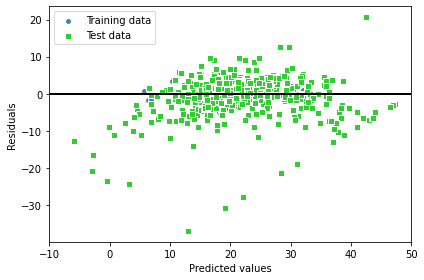

In [41]:
#残差プロットは回帰モデルを診断して非線形性や外れ値を検出し，誤差がランダムに分布しているかどうかをチェックする
#目的変数の予測値から正解値を引いている
plt.scatter(y_train_pred,  y_train_pred-y_train,
                c='steelblue', marker='o',  edgecolor='white',  label='Training data')
plt.scatter(y_test_pred,  y_test_pred-  y_test,
                 c='limegreen', marker='s',  edgecolor='white',  label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10,50])
plt.tight_layout()
plt.show()

###  平均二乗誤差  
- モデルの性能を数値化する手法の一つ
- 各データに対して「予測値と正解値の差(=誤差)」の二乗値を計算し，その総和をデータ数で割った値(＝平均値)を出力する
- 線形回帰モデルを学習させるときに使う


<img src="10-5-1.png"  width="300">

In [43]:
#訓練データセットとテストデータセットの予測値の平均二乗誤差(MSE)を計算する
from sklearn.metrics import mean_squared_error

#平均二乗誤差を出力
print('MSE train: %.3f, test: %.3f' %  (mean_squared_error(y_train, y_train_pred),
                                                       mean_squared_error(y_test,  y_test_pred)))

MSE train: 7.105, test: 30.347


 ##  決定係数
 - モデルによる予測が実際の値に比べてどれだけズレが小さいかを客観的に示す指標のこと
 - 普通0~1の範囲の値を取り，値が大きいほどモデルが適切にデータを表現出来ている
 - 決定変数の大小からモデルの良し悪しを判断出来る
 -  SSEとは予測値と真値のズレを２乗して足し合わせたもの(誤差平方和)
 
 <img src="10-5-2.png"  width="190">
  
 - SSTとは全平方和を表す．観測された予測の対象となる変数とその平均の間の差の２乗
  <img src="10-5-3.png"  width="340">
   
   
  <img src="10-5-4.png"  width="380">
  
  - テストデータセットでは負の値になる可能性がある
  - 訓練データセットは決定係数0~1の範囲になる

In [44]:
#訓練データセットとテストデータセットを使う
#R^2(決定変数)のスコアを出力
from sklearn.metrics import r2_score
print('R^2 train: %.3f,  test: %.3f'  % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

R^2 train: 0.883,  test: 0.651


# 10.6 回帰に正則化手法を使う


-  正則化は過学習の問題に対処する手法の一つ

(正則化された線形回帰の例)
###  リッジ回帰
 -    L2ペナルティ付きのモデル
 -    線形回帰のコスト関数に重みの平方和を足し合わせたもの
 -  L2ペナルティによる正則化では重みは完全に０にならない性質がある
 -  説明変数が多いときにはモデルの解釈が複雑になる欠点がある
      <img src="10-6-1.png"  width="480">
       <img src="10-6-2.png"  width="380">   
       

       
       
       
###  LASSO
   -    LASSOは教師ありの特徴量選択の手法
      -    最小２乗コスト関数に対して，重みの合計を足したもの
      -    リッジ回帰と違って不要と判断される説明変数の重みが0になる
      -    モデル構築においていくつかの説明変数が完全に無視される
      -    モデルの選択と同時に説明変数の数を削減し，説明変数の選択を自動で行う
   <img src="10-6-3.png"  width="480"> 
   <img src="10-6-4.png"  width="480"> 
   
###  Elastic Net法

   -     リッジ回帰とLassoの折衷案で，Lassoのモデルに取り込める説明変数の数に制限があるという問題点をカバー出来る
      -     L1ペナルティとL2ペナルティを使う．
      -     L1ペナルティはスパースモデルを生成するために使われる
      -     L2ペナルティはm>nの場合に特徴量をn個よりも多く選択するために使われる
   <img src="10-6-5.png"  width="580"> 

In [8]:
#リッジ回帰モデルを初期化するコード
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0) #L2ペナルティ項の影響度合いを表す値を引数に指定

In [9]:
#linear_modelサブモジュールのLASSO回帰を初期化する
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)

In [10]:
#L1ペナルティとL2ペナルティの比率を変更
from sklearn.linear_model import ElasticNet
elanet=ElasticNet(alpha=1.0,  l1_ratio=0.5)